In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

Завантаження та підготовка даних

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = train_labels.astype('int32')
test_labels = test_labels.astype('int32')

Створення архітектури мережі

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Визуалізація архітектури та збереження у файл

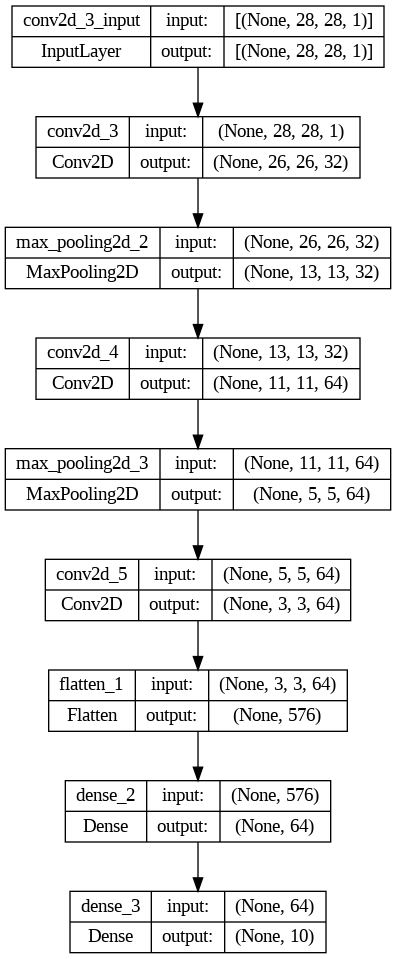

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

Компіляція моделі

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


Навчання моделі та оцінка її точності

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=300, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification Report
class_names = [str(i) for i in range(10)]
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

Epoch 1/10
200/200 [==============================] - 46s 230ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9541 - val_loss: 0.2707 - val_sparse_categorical_accuracy: 0.9133
Epoch 2/10
200/200 [==============================] - 46s 229ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.2622 - val_sparse_categorical_accuracy: 0.9147
Epoch 3/10
200/200 [==============================] - 49s 247ms/step - loss: 0.1168 - sparse_categorical_accuracy: 0.9569 - val_loss: 0.2730 - val_sparse_categorical_accuracy: 0.9147
Epoch 4/10
200/200 [==============================] - 47s 236ms/step - loss: 0.1067 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.2969 - val_sparse_categorical_accuracy: 0.9093
Epoch 5/10
200/200 [==============================] - 46s 229ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.2831 - val_sparse_categorical_accuracy: 0.9132
Epoch 6/10
200/200 [==============================] - 47s 237ms/step - loss: 0.0954 -